# Time-series Anomaly Detection
This demo shows how to use a novel SLS (Streaming Least Squares) anomaly detection algorithm and how it performs


In [26]:
%pylab inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 3]
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [27]:
from sls import detect_anomalies

___
### Example 1: Detect spikes

First, let's take a quick look at our sample time-series data file, which consists of 2 columns: datetime and counter value, aggregated every 15 minutes.

In [28]:
df = pd.read_csv('data/migraine.csv', parse_dates=True, index_col=0)

data = df['temp_avg']
data = data.fillna(method='ffill').fillna(method='bfill')
data.head(10)


local_time
2020-03-26 00:03:00+00:00    24.183714
2020-03-26 00:04:00+00:00    24.183714
2020-03-26 00:05:00+00:00    24.183714
2020-03-26 00:06:00+00:00    24.183714
2020-03-26 00:07:00+00:00    24.183714
2020-03-26 00:08:00+00:00    24.183714
2020-03-26 00:09:00+00:00    24.183714
2020-03-26 00:10:00+00:00    24.183714
2020-03-26 00:11:00+00:00    24.183714
2020-03-26 00:12:00+00:00    24.183714
Name: temp_avg, dtype: float64

,level,start,end,score
0,5,2020-03-31 21:15:00+00:00,2020-04-01 00:14:00+00:00,44.690023
1,4,2020-03-29 18:11:00+00:00,2020-03-29 21:10:00+00:00,40.521787
2,3,2020-03-26 17:46:00+00:00,2020-03-26 20:45:00+00:00,36.141729
3,3,2020-04-02 09:56:00+00:00,2020-04-02 12:55:00+00:00,35.600035
4,2,2020-04-01 18:31:00+00:00,2020-04-01 21:30:00+00:00,30.286022
5,2,2020-03-28 05:16:00+00:00,2020-03-28 08:15:00+00:00,29.246602
6,1,2020-04-01 13:24:00+00:00,2020-04-01 16:23:00+00:00,22.107946
7,1,2020-03-26 12:15:00+00:00,2020-03-26 15:14:00+00:00,21.575157
8,1,2020-04-02 20:55:00+00:00,2020-04-02 23:54:00+00:00,20.393453
9,1,2020-04-02 06:49:00+00:00,2020-04-02 09:48:00+00:00,19.777200


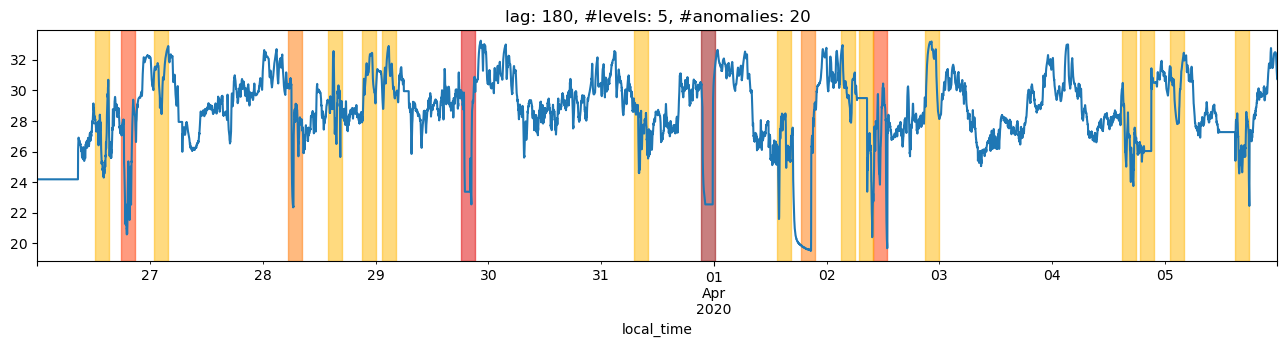

In [29]:
anomalies, thresholds = detect_anomalies(data, lag=180, num_anomalies=20)

___________
### Example 2: Detect dips

In the above, SLS was able to detect spikes in the series. The same algorithm can be used for detecting dips as well, e.g. outages (sudden drop in sessions server).

In [30]:
df = pd.read_csv('data/sample2.csv', parse_dates=True, index_col=0)
data = df['Value']

,level,start,end,score
0,5,2018-02-26 16:00:00,2018-03-08 00:00:00,43.883279
1,4,2018-01-26 16:00:00,2018-02-06 16:00:00,19.743103
2,3,2017-12-20 16:00:00,2018-01-02 16:00:00,16.429919
3,2,2018-01-16 16:00:00,2018-01-25 16:00:00,15.391135
4,1,2017-12-08 16:00:00,2017-12-19 16:00:00,12.526522


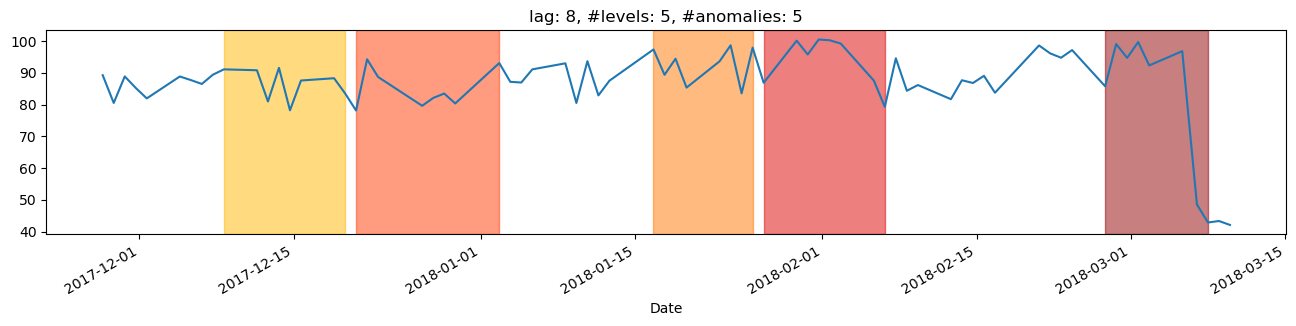

In [31]:
anomalies, thresholds = detect_anomalies(data, lag=8, num_anomalies=5)